# Machine Learning Assignment
* 전효림, 2023711994, 인공지능융합학과
* 보고서와 같은 순서로 작성하였습니다

# 2 Data
## 2.1 Data Description

In [1]:
import pandas as pd
train = pd.read_csv('~/hyolim/23_1/ML/P1/train.csv')
test = pd.read_csv('~/hyolim/23_1/ML/P1/test.csv')
train.shape, test.shape

((405, 384), (100, 384))

In [2]:
X_train = train.drop(['label'], axis=1)
y_train = train['label']
X_train.shape, y_train.shape

((405, 383), (405,))

In [3]:
X_test = test.drop(['id'],axis=1)
X_test.shape

(100, 383)

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Columns: 383 entries, emotion_angry_mean to equivalentSoundLevel_dBp_max
dtypes: float64(383)
memory usage: 1.2 MB


In [216]:
X_train.describe()

,emotion_angry_mean,emotion_disgust_mean,emotion_fear_mean,emotion_happy_mean,emotion_sad_mean,emotion_surprise_mean,emotion_neutral_mean,F0semitoneFrom27.5Hz_sma3nz_amean_mean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm_mean,F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean,...,slopeUV0-500_sma3nz_amean_max,slopeUV500-1500_sma3nz_amean_max,spectralFluxUV_sma3nz_amean_max,loudnessPeaksPerSec_max,VoicedSegmentsPerSec_max,MeanVoicedSegmentLengthSec_max,StddevVoicedSegmentLengthSec_max,MeanUnvoicedSegmentLength_max,StddevUnvoicedSegmentLength_max,equivalentSoundLevel_dBp_max
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,...,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,0.128547,0.001497,0.103264,0.254882,0.168895,0.049551,0.292277,29.346558,0.198189,25.019881,...,0.001047,0.000085,0.499620,2.904168,1.808104,0.056687,0.009502,0.014898,0.001936,33.312747
std,0.076677,0.003867,0.062884,0.158745,0.086977,0.039873,0.140812,4.266925,0.055253,4.775517,...,0.000659,0.000041,0.838803,1.509635,0.544651,0.019853,0.002324,0.020822,0.001692,43.882495
min,0.016640,0.000000,0.006478,0.004862,0.013841,0.000071,0.030691,16.619584,0.069653,13.466307,...,0.000101,0.000017,0.000165,1.295885,0.279132,0.009075,0.002254,0.000186,0.000010,2.464138
25%,0.075787,0.000274,0.060436,0.129078,0.109232,0.021841,0.191642,26.544692,0.160546,21.451660,...,0.000571,0.000058,0.045291,2.124013,1.462158,0.042776,0.007832,0.003147,0.000767,12.861749
50%,0.107647,0.000730,0.093147,0.218791,0.156738,0.040356,0.258004,29.679407,0.195586,24.918786,...,0.000924,0.000077,0.204538,2.546136,1.731777,0.055857,0.009412,0.006410,0.001360,22.113732
75%,0.156998,0.001495,0.131392,0.366490,0.205958,0.065098,0.373710,32.246419,0.236212,28.494555,...,0.001333,0.000102,0.637699,3.130875,2.118498,0.071533,0.011019,0.017861,0.002583,35.912709
max,0.633676,0.065586,0.537772,0.772197,0.644095,0.271421,0.839916,47.922431,0.352617,43.443398,...,0.004872,0.000287,11.608986,14.659670,4.665172,0.114081,0.016405,0.135903,0.011209,389.701756


## 2.2 Data Pre-processing

In [25]:
## Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=1215)
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test) # 예측값 추론
y_pred 

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

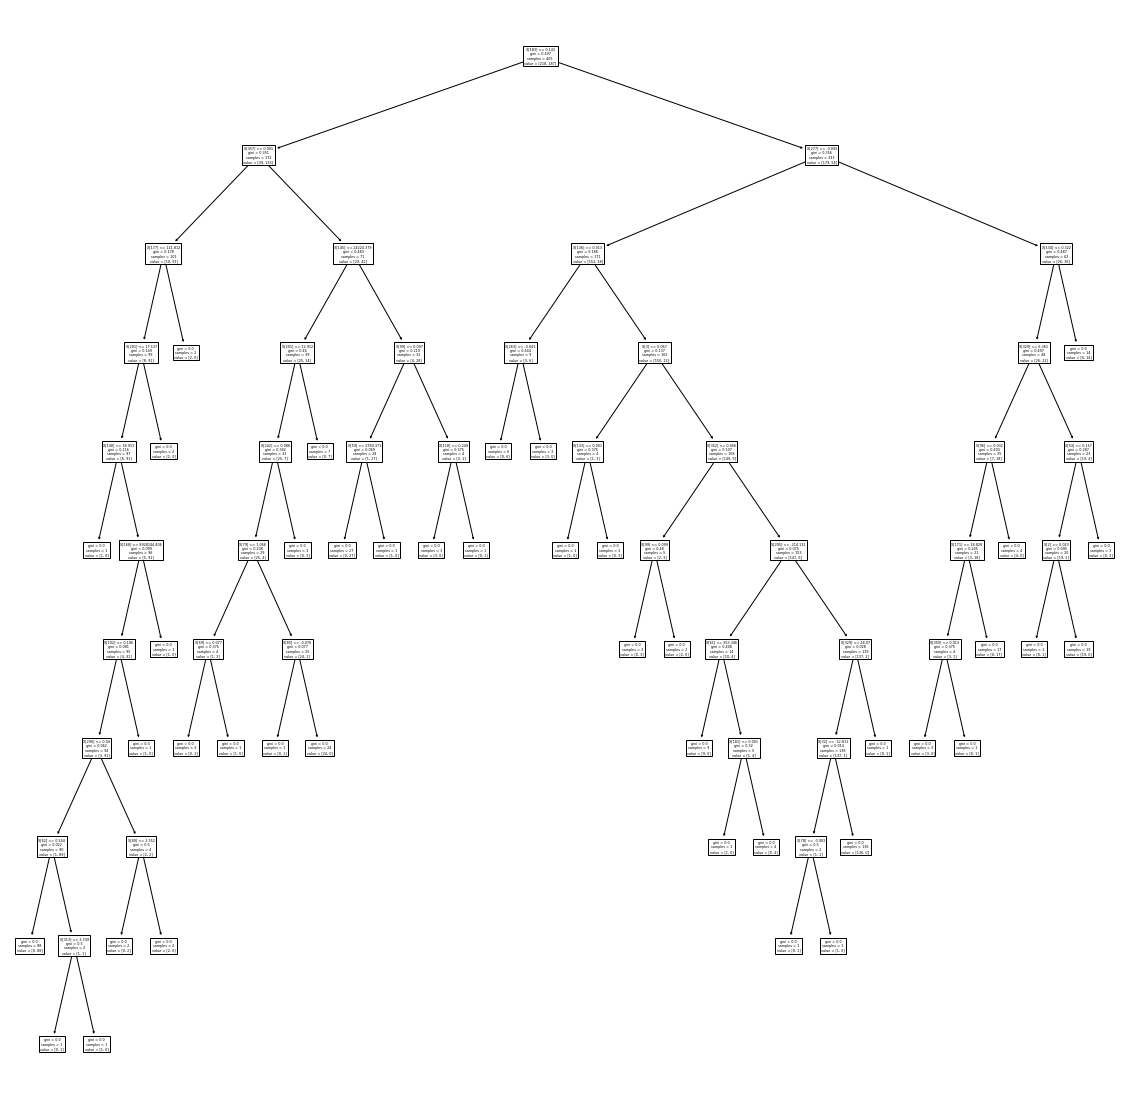

In [26]:
## visualize tree

import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,20)) 
tree.plot_tree(dt_clf)
plt.show()

### 1) feature importance -> 활용해서 변수 줄이기

In [27]:
train.columns

Index(['emotion_angry_mean', 'emotion_disgust_mean', 'emotion_fear_mean',
       'emotion_happy_mean', 'emotion_sad_mean', 'emotion_surprise_mean',
       'emotion_neutral_mean', 'F0semitoneFrom27.5Hz_sma3nz_amean_mean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm_mean',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean',
       ...
       'slopeUV500-1500_sma3nz_amean_max', 'spectralFluxUV_sma3nz_amean_max',
       'loudnessPeaksPerSec_max', 'VoicedSegmentsPerSec_max',
       'MeanVoicedSegmentLengthSec_max', 'StddevVoicedSegmentLengthSec_max',
       'MeanUnvoicedSegmentLength_max', 'StddevUnvoicedSegmentLength_max',
       'equivalentSoundLevel_dBp_max', 'label'],
      dtype='object', length=384)

In [218]:
len(train.columns)

384

In [30]:
# 0 이상인 변수들만 남기기
# feature 별 feature importance 매핑
for name, value in zip(X_train.columns, dt_clf.feature_importances_):
    if value > 0:
        print('{0}: {1:.3f}'.format(name, value))

emotion_fear_mean: 0.009
emotion_happy_mean: 0.019
mfcc2_sma3_stddevNorm_mean: 0.005
F2frequency_sma3nz_stddevNorm_mean: 0.023
F3frequency_sma3nz_amean_mean: 0.010
F3bandwidth_sma3nz_amean_mean: 0.020
F3bandwidth_sma3nz_stddevNorm_mean: 0.005
slopeV0-500_sma3nz_amean_mean: 0.007
mfcc2V_sma3nz_stddevNorm_mean: 0.005
mfcc3V_sma3nz_amean_mean: 0.017
slopeUV0-500_sma3nz_amean_mean: 0.010
VoicedSegmentsPerSec_mean: 0.010
emotion_angry_var: 0.025
emotion_happy_var: 0.030
emotion_neutral_var: 0.009
loudness_sma3_pctlrange0-2_var: 0.007
jitterLocal_sma3nz_amean_var: 0.007
jitterLocal_sma3nz_stddevNorm_var: 0.032
shimmerLocaldB_sma3nz_stddevNorm_var: 0.030
logRelF0-H1-H2_sma3nz_stddevNorm_var: 0.009
F1bandwidth_sma3nz_amean_var: 0.047
slopeV500-1500_sma3nz_stddevNorm_var: 0.009
mfcc1V_sma3nz_amean_var: 0.018
mfcc4V_sma3nz_amean_var: 0.016
slopeUV0-500_sma3nz_amean_var: 0.008
spectralFluxUV_sma3nz_amean_var: 0.288
F0semitoneFrom27.5Hz_sma3nz_percentile20.0_min: 0.052
F0semitoneFrom27.5Hz_sma3nz_

결과: 1. feature importance가 0 이상인 애들만 남김

In [32]:
X_train_exp1 = X_train[['emotion_fear_mean','emotion_happy_mean','mfcc2_sma3_stddevNorm_mean',
                       'F2frequency_sma3nz_stddevNorm_mean', 'F3frequency_sma3nz_amean_mean',
                       'F3bandwidth_sma3nz_amean_mean', 'F3bandwidth_sma3nz_stddevNorm_mean',
                       'slopeV0-500_sma3nz_amean_mean', 'mfcc2V_sma3nz_stddevNorm_mean',
                        'mfcc3V_sma3nz_amean_mean', 'slopeUV0-500_sma3nz_amean_mean', 'VoicedSegmentsPerSec_mean',
                        'emotion_angry_var', 'emotion_happy_var', 'emotion_neutral_var', 'loudness_sma3_pctlrange0-2_var',
                        'jitterLocal_sma3nz_amean_var', 'jitterLocal_sma3nz_stddevNorm_var', 'shimmerLocaldB_sma3nz_stddevNorm_var',
                        'logRelF0-H1-H2_sma3nz_stddevNorm_var', 'F1bandwidth_sma3nz_amean_var', 'slopeV500-1500_sma3nz_stddevNorm_var',
                        'mfcc1V_sma3nz_amean_var', 'mfcc4V_sma3nz_amean_var', 'slopeUV0-500_sma3nz_amean_var', 'spectralFluxUV_sma3nz_amean_var',
                        'F0semitoneFrom27.5Hz_sma3nz_percentile20.0_min', 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_min',
                        'F1bandwidth_sma3nz_stddevNorm_min', 'slopeV500-1500_sma3nz_amean_min', 'slopeUV0-500_sma3nz_amean_min',
                        'emotion_fear_max', 'loudness_sma3_meanFallingSlope_max', 'HNRdBACF_sma3nz_amean_max', 'F3bandwidth_sma3nz_stddevNorm_max',
                        'F3amplitudeLogRelF0_sma3nz_stddevNorm_max','slopeV0-500_sma3nz_amean_max'
                       ]]
X_test_exp1 = X_test[['emotion_fear_mean','emotion_happy_mean','mfcc2_sma3_stddevNorm_mean',
                       'F2frequency_sma3nz_stddevNorm_mean', 'F3frequency_sma3nz_amean_mean',
                       'F3bandwidth_sma3nz_amean_mean', 'F3bandwidth_sma3nz_stddevNorm_mean',
                       'slopeV0-500_sma3nz_amean_mean', 'mfcc2V_sma3nz_stddevNorm_mean',
                        'mfcc3V_sma3nz_amean_mean', 'slopeUV0-500_sma3nz_amean_mean', 'VoicedSegmentsPerSec_mean',
                        'emotion_angry_var', 'emotion_happy_var', 'emotion_neutral_var', 'loudness_sma3_pctlrange0-2_var',
                        'jitterLocal_sma3nz_amean_var', 'jitterLocal_sma3nz_stddevNorm_var', 'shimmerLocaldB_sma3nz_stddevNorm_var',
                        'logRelF0-H1-H2_sma3nz_stddevNorm_var', 'F1bandwidth_sma3nz_amean_var', 'slopeV500-1500_sma3nz_stddevNorm_var',
                        'mfcc1V_sma3nz_amean_var', 'mfcc4V_sma3nz_amean_var', 'slopeUV0-500_sma3nz_amean_var', 'spectralFluxUV_sma3nz_amean_var',
                        'F0semitoneFrom27.5Hz_sma3nz_percentile20.0_min', 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_min',
                        'F1bandwidth_sma3nz_stddevNorm_min', 'slopeV500-1500_sma3nz_amean_min', 'slopeUV0-500_sma3nz_amean_min',
                        'emotion_fear_max', 'loudness_sma3_meanFallingSlope_max', 'HNRdBACF_sma3nz_amean_max', 'F3bandwidth_sma3nz_stddevNorm_max',
                        'F3amplitudeLogRelF0_sma3nz_stddevNorm_max','slopeV0-500_sma3nz_amean_max'
                       ]]

In [187]:
len(X_test_exp1.columns)

37

### 2) Plot tree -> 활용해서 변수 줄이기

In [186]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=1215)
dt_clf.fit(X_train_exp1, y_train)

y_pred_1 = dt_clf.predict(X_test_exp1) # 예측값 추론
y_pred_1

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

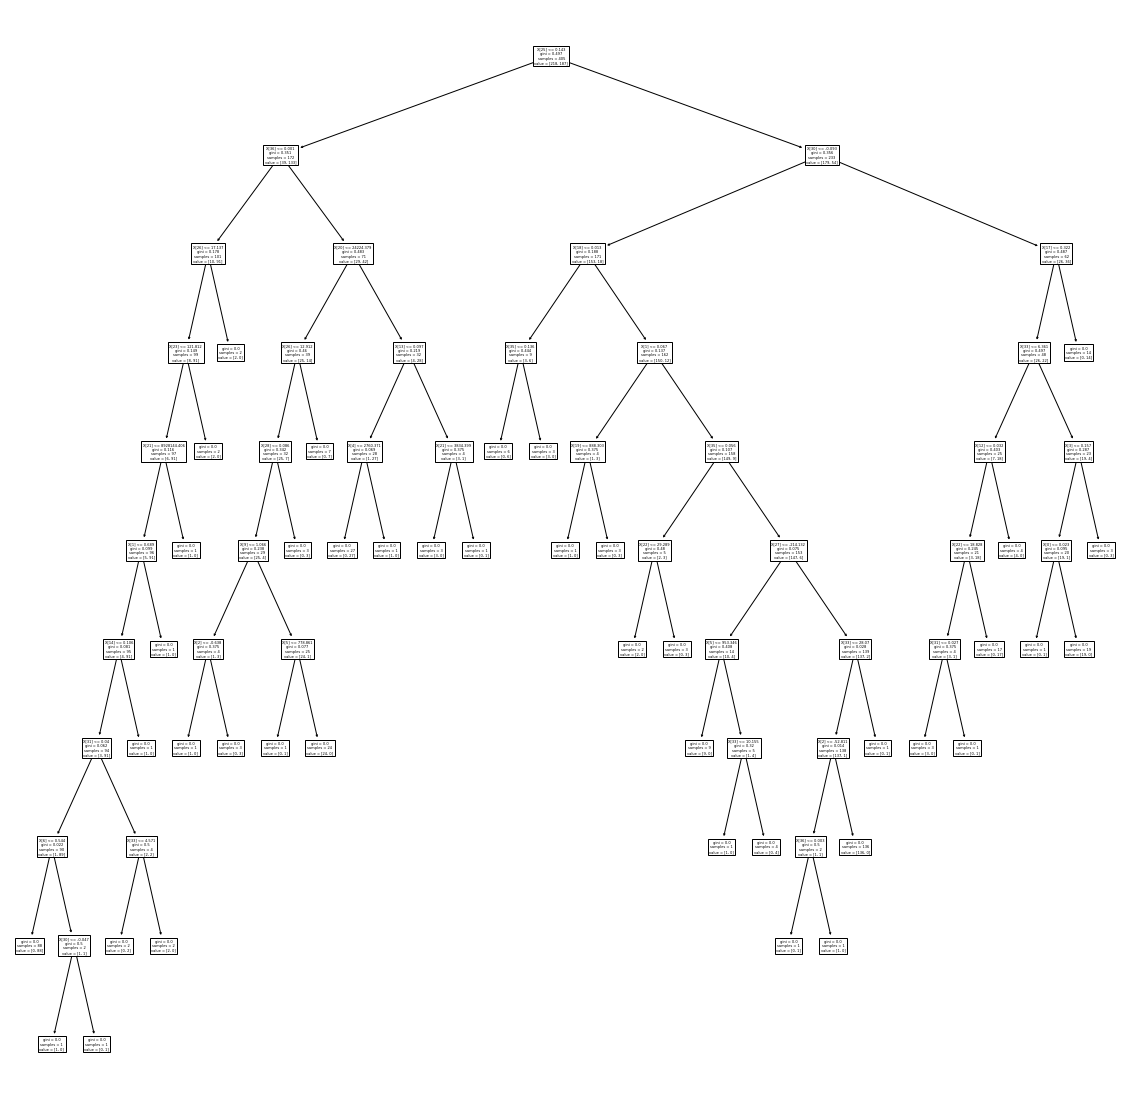

In [34]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,20)) 
tree.plot_tree(dt_clf)
plt.show()

emotion_fear_mean: 0.009
emotion_happy_mean: 0.028
mfcc2_sma3_stddevNorm_mean: 0.012
F2frequency_sma3nz_stddevNorm_mean: 0.023
F3frequency_sma3nz_amean_mean: 0.010
F3bandwidth_sma3nz_amean_mean: 0.030
F3bandwidth_sma3nz_stddevNorm_mean: 0.005
slopeV0-500_sma3nz_amean_mean: 0.000
mfcc2V_sma3nz_stddevNorm_mean: 0.000
mfcc3V_sma3nz_amean_mean: 0.017
slopeUV0-500_sma3nz_amean_mean: 0.000
VoicedSegmentsPerSec_mean: 0.000
emotion_angry_var: 0.025
emotion_happy_var: 0.018
emotion_neutral_var: 0.009
loudness_sma3_pctlrange0-2_var: 0.000
jitterLocal_sma3nz_amean_var: 0.000
jitterLocal_sma3nz_stddevNorm_var: 0.032
shimmerLocaldB_sma3nz_stddevNorm_var: 0.030
logRelF0-H1-H2_sma3nz_stddevNorm_var: 0.007
F1bandwidth_sma3nz_amean_var: 0.047
slopeV500-1500_sma3nz_stddevNorm_var: 0.016
mfcc1V_sma3nz_amean_var: 0.030
mfcc4V_sma3nz_amean_var: 0.017
slopeUV0-500_sma3nz_amean_var: 0.000
spectralFluxUV_sma3nz_amean_var: 0.288
F0semitoneFrom27.5Hz_sma3nz_percentile20.0_min: 0.051
F0semitoneFrom27.5Hz_sma3nz_

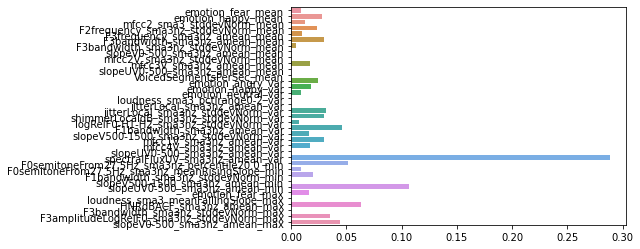

In [36]:
import seaborn as sns
import numpy as np

# feature importance 추출
#print("Feature Importances:\n{0}\n".format(np.round(dt_clf.feature_importances_, 3)))

# feature 별 feature importance 매핑
for name, value in zip(X_train_exp1.columns, dt_clf.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))
    
# feature importance 시각화
sns.barplot(x=dt_clf.feature_importances_, y=X_train_exp1.columns)
plt.show()

결과 2. feature importance가 0 이상인 애들만 남김 -> 2차 시도

In [37]:
X_train_exp2 = X_train[['emotion_fear_mean','emotion_happy_mean','mfcc2_sma3_stddevNorm_mean',
                       'F2frequency_sma3nz_stddevNorm_mean', 'F3frequency_sma3nz_amean_mean',
                       'F3bandwidth_sma3nz_amean_mean', 'F3bandwidth_sma3nz_stddevNorm_mean',
                        'mfcc3V_sma3nz_amean_mean', 
                        'emotion_angry_var', 'emotion_happy_var', 'emotion_neutral_var', 
                        'jitterLocal_sma3nz_stddevNorm_var', 'shimmerLocaldB_sma3nz_stddevNorm_var',
                        'logRelF0-H1-H2_sma3nz_stddevNorm_var', 'F1bandwidth_sma3nz_amean_var', 'slopeV500-1500_sma3nz_stddevNorm_var',
                        'mfcc1V_sma3nz_amean_var', 'mfcc4V_sma3nz_amean_var',  'spectralFluxUV_sma3nz_amean_var',
                        'F0semitoneFrom27.5Hz_sma3nz_percentile20.0_min', 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_min',
                        'F1bandwidth_sma3nz_stddevNorm_min', 'slopeUV0-500_sma3nz_amean_min',
                        'emotion_fear_max', 'HNRdBACF_sma3nz_amean_max', 'F3amplitudeLogRelF0_sma3nz_stddevNorm_max','slopeV0-500_sma3nz_amean_max'
                       ]]
X_test_exp2 = X_test[['emotion_fear_mean','emotion_happy_mean','mfcc2_sma3_stddevNorm_mean',
                       'F2frequency_sma3nz_stddevNorm_mean', 'F3frequency_sma3nz_amean_mean',
                       'F3bandwidth_sma3nz_amean_mean', 'F3bandwidth_sma3nz_stddevNorm_mean',
                        'mfcc3V_sma3nz_amean_mean', 
                        'emotion_angry_var', 'emotion_happy_var', 'emotion_neutral_var', 
                        'jitterLocal_sma3nz_stddevNorm_var', 'shimmerLocaldB_sma3nz_stddevNorm_var',
                        'logRelF0-H1-H2_sma3nz_stddevNorm_var', 'F1bandwidth_sma3nz_amean_var', 'slopeV500-1500_sma3nz_stddevNorm_var',
                        'mfcc1V_sma3nz_amean_var', 'mfcc4V_sma3nz_amean_var',  'spectralFluxUV_sma3nz_amean_var',
                        'F0semitoneFrom27.5Hz_sma3nz_percentile20.0_min', 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_min',
                        'F1bandwidth_sma3nz_stddevNorm_min', 'slopeUV0-500_sma3nz_amean_min',
                        'emotion_fear_max', 'HNRdBACF_sma3nz_amean_max', 'F3amplitudeLogRelF0_sma3nz_stddevNorm_max','slopeV0-500_sma3nz_amean_max'
                       ]]

In [41]:
len(X_train_exp2.columns)

27

In [188]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=1215)
dt_clf.fit(X_train_exp2, y_train) ####

y_pred_2 = dt_clf.predict(X_test_exp2) # 예측값 추론
y_pred_2

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

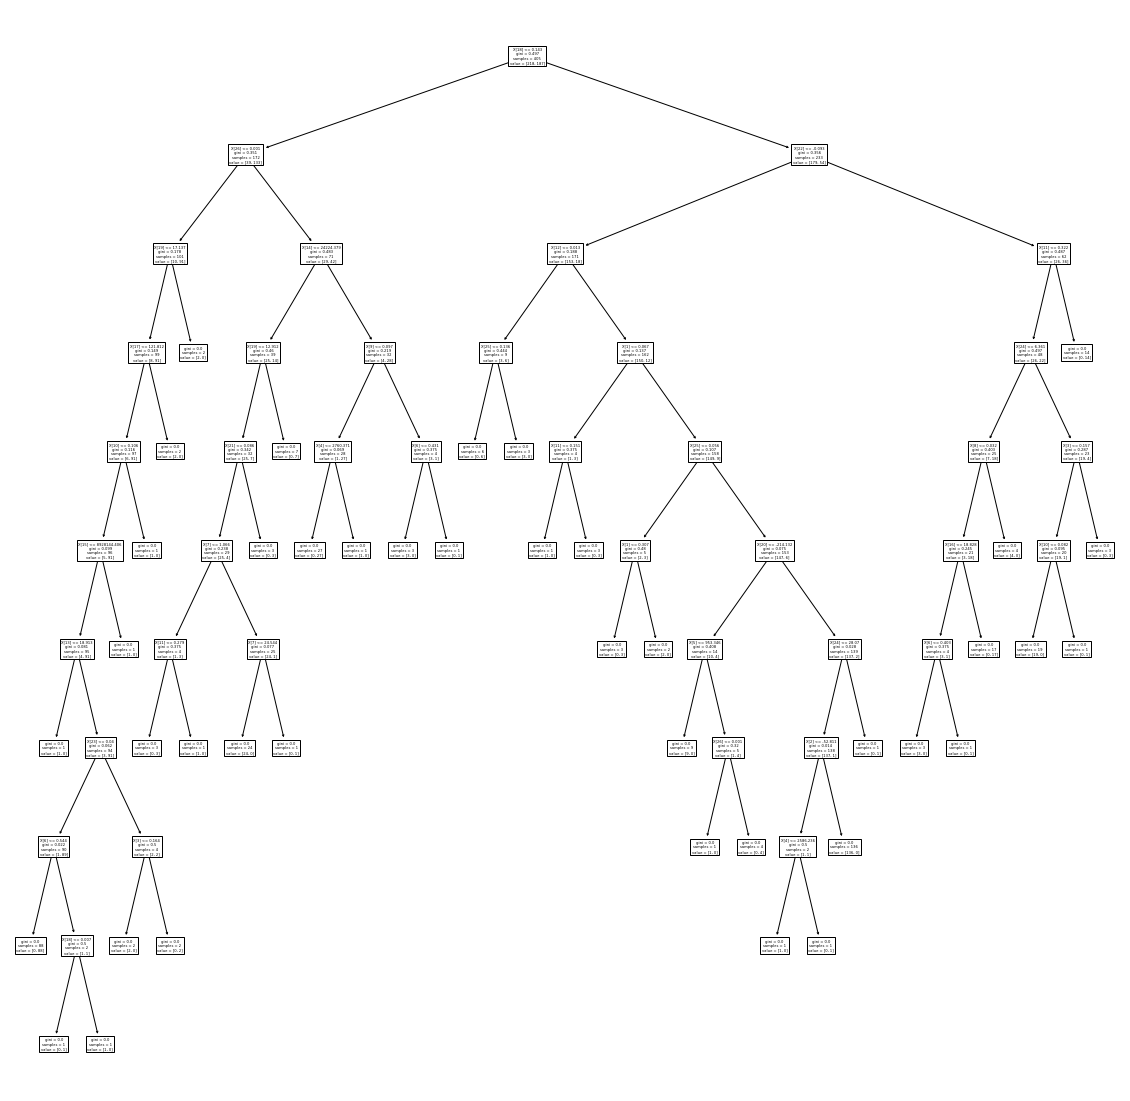

In [45]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,20)) 
tree.plot_tree(dt_clf)
plt.show()

emotion_fear_mean: 0.000
emotion_happy_mean: 0.031
mfcc2_sma3_stddevNorm_mean: 0.005
F2frequency_sma3nz_stddevNorm_mean: 0.033
F3frequency_sma3nz_amean_mean: 0.015
F3bandwidth_sma3nz_amean_mean: 0.020
F3bandwidth_sma3nz_stddevNorm_mean: 0.020
mfcc3V_sma3nz_amean_mean: 0.027
emotion_angry_var: 0.025
emotion_happy_var: 0.018
emotion_neutral_var: 0.018
jitterLocal_sma3nz_stddevNorm_var: 0.046
shimmerLocaldB_sma3nz_stddevNorm_var: 0.030
logRelF0-H1-H2_sma3nz_stddevNorm_var: 0.009
F1bandwidth_sma3nz_amean_var: 0.047
slopeV500-1500_sma3nz_stddevNorm_var: 0.009
mfcc1V_sma3nz_amean_var: 0.018
mfcc4V_sma3nz_amean_var: 0.017
spectralFluxUV_sma3nz_amean_var: 0.293
F0semitoneFrom27.5Hz_sma3nz_percentile20.0_min: 0.051
F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_min: 0.009
F1bandwidth_sma3nz_stddevNorm_min: 0.020
slopeUV0-500_sma3nz_amean_min: 0.102
emotion_fear_max: 0.009
HNRdBACF_sma3nz_amean_max: 0.045
F3amplitudeLogRelF0_sma3nz_stddevNorm_max: 0.035
slopeV0-500_sma3nz_amean_max: 0.048


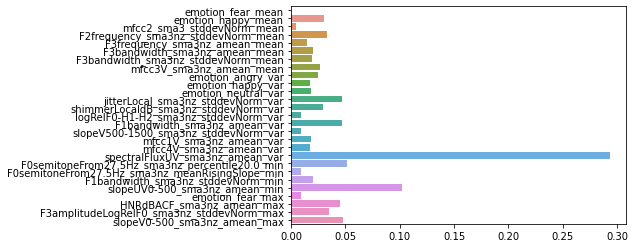

In [44]:
import seaborn as sns
import numpy as np

# feature importance 추출
#print("Feature Importances:\n{0}\n".format(np.round(dt_clf.feature_importances_, 3)))

# feature 별 feature importance 매핑
for name, value in zip(X_train_exp2.columns, dt_clf.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))
    
# feature importance 시각화
sns.barplot(x=dt_clf.feature_importances_, y=X_train_exp2.columns)
plt.show()

결과 : 3. feature importance가 0인 값 하나 마지막으로 더 빼줌

In [45]:
X_train_exp3 = X_train[['emotion_happy_mean','mfcc2_sma3_stddevNorm_mean',
                       'F2frequency_sma3nz_stddevNorm_mean', 'F3frequency_sma3nz_amean_mean',
                       'F3bandwidth_sma3nz_amean_mean', 'F3bandwidth_sma3nz_stddevNorm_mean',
                        'mfcc3V_sma3nz_amean_mean', 
                        'emotion_angry_var', 'emotion_happy_var', 'emotion_neutral_var', 
                        'jitterLocal_sma3nz_stddevNorm_var', 'shimmerLocaldB_sma3nz_stddevNorm_var',
                        'logRelF0-H1-H2_sma3nz_stddevNorm_var', 'F1bandwidth_sma3nz_amean_var', 'slopeV500-1500_sma3nz_stddevNorm_var',
                        'mfcc1V_sma3nz_amean_var', 'mfcc4V_sma3nz_amean_var',  'spectralFluxUV_sma3nz_amean_var',
                        'F0semitoneFrom27.5Hz_sma3nz_percentile20.0_min', 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_min',
                        'F1bandwidth_sma3nz_stddevNorm_min', 'slopeUV0-500_sma3nz_amean_min',
                        'emotion_fear_max', 'HNRdBACF_sma3nz_amean_max', 'F3amplitudeLogRelF0_sma3nz_stddevNorm_max','slopeV0-500_sma3nz_amean_max'
                       ]]
X_test_exp3 = X_test[['emotion_happy_mean','mfcc2_sma3_stddevNorm_mean',
                       'F2frequency_sma3nz_stddevNorm_mean', 'F3frequency_sma3nz_amean_mean',
                       'F3bandwidth_sma3nz_amean_mean', 'F3bandwidth_sma3nz_stddevNorm_mean',
                        'mfcc3V_sma3nz_amean_mean', 
                        'emotion_angry_var', 'emotion_happy_var', 'emotion_neutral_var', 
                        'jitterLocal_sma3nz_stddevNorm_var', 'shimmerLocaldB_sma3nz_stddevNorm_var',
                        'logRelF0-H1-H2_sma3nz_stddevNorm_var', 'F1bandwidth_sma3nz_amean_var', 'slopeV500-1500_sma3nz_stddevNorm_var',
                        'mfcc1V_sma3nz_amean_var', 'mfcc4V_sma3nz_amean_var',  'spectralFluxUV_sma3nz_amean_var',
                        'F0semitoneFrom27.5Hz_sma3nz_percentile20.0_min', 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_min',
                        'F1bandwidth_sma3nz_stddevNorm_min', 'slopeUV0-500_sma3nz_amean_min',
                        'emotion_fear_max', 'HNRdBACF_sma3nz_amean_max', 'F3amplitudeLogRelF0_sma3nz_stddevNorm_max','slopeV0-500_sma3nz_amean_max'
                       ]]

In [219]:
len(X_train_exp3.columns)

26

In [47]:
for name, value in zip(X_train_exp3.columns, dt_clf.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))

emotion_happy_mean: 0.000
mfcc2_sma3_stddevNorm_mean: 0.031
F2frequency_sma3nz_stddevNorm_mean: 0.005
F3frequency_sma3nz_amean_mean: 0.033
F3bandwidth_sma3nz_amean_mean: 0.015
F3bandwidth_sma3nz_stddevNorm_mean: 0.020
mfcc3V_sma3nz_amean_mean: 0.020
emotion_angry_var: 0.027
emotion_happy_var: 0.025
emotion_neutral_var: 0.018
jitterLocal_sma3nz_stddevNorm_var: 0.018
shimmerLocaldB_sma3nz_stddevNorm_var: 0.046
logRelF0-H1-H2_sma3nz_stddevNorm_var: 0.030
F1bandwidth_sma3nz_amean_var: 0.009
slopeV500-1500_sma3nz_stddevNorm_var: 0.047
mfcc1V_sma3nz_amean_var: 0.009
mfcc4V_sma3nz_amean_var: 0.018
spectralFluxUV_sma3nz_amean_var: 0.017
F0semitoneFrom27.5Hz_sma3nz_percentile20.0_min: 0.293
F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_min: 0.051
F1bandwidth_sma3nz_stddevNorm_min: 0.009
slopeUV0-500_sma3nz_amean_min: 0.020
emotion_fear_max: 0.102
HNRdBACF_sma3nz_amean_max: 0.009
F3amplitudeLogRelF0_sma3nz_stddevNorm_max: 0.045
slopeV0-500_sma3nz_amean_max: 0.035


26개의 변수 -> randomforest로 결과 뽑아보기

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':(30, 40, 50, 60, 80, 100, 200),
    'max_depth' : (2, 3, 4, 6, 8, 12),
    'min_samples_leaf' : (4, 8, 14, 18, 20),
    'min_samples_split' : (2, 4, 8, 16, 20),
    'criterion' : ('entropy','gini') 
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=5, n_jobs=-1)
#grid_cv.fit(X_train11, y_train11)
grid_cv.fit(X_train_exp3, y_train) 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 18, 'min_samples_split': 2, 'n_estimators': 50}
최적 예측 정확도: 0.8272


In [191]:
y_pred_3 = grid_cv.predict(X_test_exp3)
y_pred_3

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1])

### 3) Covariate, Covariance, P-value
* feature importance는 어느정도했으니까 다른 방법으로 열을 좀 더 줄여보자

In [115]:
# 세번의 필터링으로 남은 열의 개수
X_train_exp3.columns
len(X_train_exp3.columns)

26

In [116]:
Y =  y_train
import scipy.stats as stats

for item in X_train_exp3:
    print(item)
    X=X_train_exp2[item].values
    print('Covariance:{:.2f}'.format(np.cov(X,Y)[0,1]))
    print('Correlation:{:.2f}'.format(stats.pearsonr(X,Y)[0])) # -1에서 1 사이의 값, 0은 선형 관계가 전혀 없다는 뜻
    print('P-value:{:.4f}'.format(stats.pearsonr(X,Y)[1]))
    print('\n')

emotion_happy_mean
Covariance:-0.02
Correlation:-0.30
P-value:0.0000


mfcc2_sma3_stddevNorm_mean
Covariance:-0.34
Correlation:-0.02
P-value:0.7232


F2frequency_sma3nz_stddevNorm_mean
Covariance:0.00
Correlation:0.13
P-value:0.0080


F3frequency_sma3nz_amean_mean
Covariance:-5.23
Correlation:-0.11
P-value:0.0270


F3bandwidth_sma3nz_amean_mean
Covariance:-9.11
Correlation:-0.24
P-value:0.0000


F3bandwidth_sma3nz_stddevNorm_mean
Covariance:-0.00
Correlation:-0.05
P-value:0.3503


mfcc3V_sma3nz_amean_mean
Covariance:-0.15
Correlation:-0.04
P-value:0.3817


emotion_angry_var
Covariance:-0.00
Correlation:-0.05
P-value:0.3150


emotion_happy_var
Covariance:-0.01
Correlation:-0.41
P-value:0.0000


emotion_neutral_var
Covariance:-0.00
Correlation:-0.09
P-value:0.0833


jitterLocal_sma3nz_stddevNorm_var
Covariance:0.00
Correlation:0.01
P-value:0.8175


shimmerLocaldB_sma3nz_stddevNorm_var
Covariance:0.00
Correlation:0.12
P-value:0.0158


logRelF0-H1-H2_sma3nz_stddevNorm_var
Covariance:-10126

* 가정
  * 일반적으로, covariance와 correlation이 0에 수렴하고 p-value가 0.05보다 큰 변수는 두 변수 간에 선형적인 관계가 거의 없거나 없다는 것을 나타낸다

* 삭제할 변수 선택하기
  * 두 개 이상에 해당: mfcc2_sma3_stddevNorm_mean, F3bandwidth_sma3nz_stddevNorm_mean, emotion_angry_var, emotion_neutral_var
  * 세 개에 모두 해당: emotion_fear_mean, jitterLocal_sma3nz_stddevNorm_var

* 결과
  * 4. 세 가지 기준 중 두 개이상에 해당되는 열들을 뺴줌 6개의 열

In [142]:
X_train_exp4 = X_train[['emotion_happy_mean', 'F2frequency_sma3nz_stddevNorm_mean', 'F3frequency_sma3nz_amean_mean',
       'F3bandwidth_sma3nz_amean_mean', 'mfcc3V_sma3nz_amean_mean',  'emotion_happy_var',
       'shimmerLocaldB_sma3nz_stddevNorm_var',
       'logRelF0-H1-H2_sma3nz_stddevNorm_var', 'F1bandwidth_sma3nz_amean_var',
       'slopeV500-1500_sma3nz_stddevNorm_var', 'mfcc1V_sma3nz_amean_var',
       'mfcc4V_sma3nz_amean_var', 'spectralFluxUV_sma3nz_amean_var',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0_min',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_min',
       'F1bandwidth_sma3nz_stddevNorm_min', 'slopeUV0-500_sma3nz_amean_min',
       'emotion_fear_max', 'HNRdBACF_sma3nz_amean_max',
       'F3amplitudeLogRelF0_sma3nz_stddevNorm_max',
       'slopeV0-500_sma3nz_amean_max']]
X_test_exp4 = X_test[['emotion_happy_mean', 'F2frequency_sma3nz_stddevNorm_mean', 'F3frequency_sma3nz_amean_mean',
       'F3bandwidth_sma3nz_amean_mean', 'mfcc3V_sma3nz_amean_mean',  'emotion_happy_var',
       'shimmerLocaldB_sma3nz_stddevNorm_var',
       'logRelF0-H1-H2_sma3nz_stddevNorm_var', 'F1bandwidth_sma3nz_amean_var',
       'slopeV500-1500_sma3nz_stddevNorm_var', 'mfcc1V_sma3nz_amean_var',
       'mfcc4V_sma3nz_amean_var', 'spectralFluxUV_sma3nz_amean_var',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0_min',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_min',
       'F1bandwidth_sma3nz_stddevNorm_min', 'slopeUV0-500_sma3nz_amean_min',
       'emotion_fear_max', 'HNRdBACF_sma3nz_amean_max',
       'F3amplitudeLogRelF0_sma3nz_stddevNorm_max',
       'slopeV0-500_sma3nz_amean_max']]

### len(X_train_exp4.columns), len(X_test_exp4.columns)

In [155]:
# random forest로 실험해보기
params = {
    'n_estimators':(30, 40, 50, 100, 200),
    'max_depth' : (2, 4, 6, 8, 10, 12),
    'min_samples_leaf' : (2, 4, 8, 18, 20),
    'min_samples_split' : (2, 4, 8, 16, 20),
    'criterion' : ('entropy','gini'),
    'max_features' : ('sqrt','log2', None)
    }

rf_clf = RandomForestClassifier(random_state=1215, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train_exp4, y_train) 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 16, 'n_estimators': 30}
최적 예측 정확도: 0.8321


* 결과 해석: 정확도가 0.8272에서 0.8321로 미세하게 올라감

In [181]:
rf_clf.fit(X_train_exp4, y_train)

RandomForestClassifier(n_jobs=-1, random_state=1215)

In [183]:
y_pred = rf_clf.predict(X_test_exp4) # 예측값 추론
y_pred # 0.8375

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [193]:
y_pred_4 = y_pred

# 3 Analysis
* 모델에 활용할 피쳐 분석

## 3.0 21개 열 확인 및 분석

In [161]:
# Random Forest Classifier로부터 중요 피쳐 추출
importances = rf_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)
# np.std: standard deviation (표준편차)

/tmp/ipykernel_3885435/322083700.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


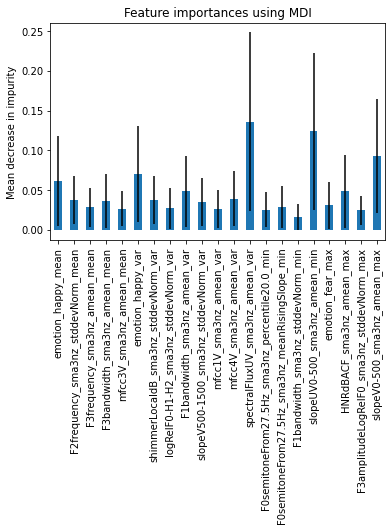

In [162]:
import pandas as pd

forest_importances = pd.Series(importances, index=X_train_exp4.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [220]:
X_train_exp4.describe().T

,count,mean,std,min,25%,50%,75%,max
emotion_happy_mean,405.0,2.548819e-01,1.587448e-01,0.004862,0.129078,0.218791,0.366490,7.721968e-01
F2frequency_sma3nz_stddevNorm_mean,405.0,1.493518e-01,1.424954e-02,0.084982,0.140704,0.148716,0.157261,1.921650e-01
F3frequency_sma3nz_amean_mean,405.0,2.591719e+03,9.533085e+01,1922.325196,2557.153202,2596.888207,2639.904230,2.843161e+03
F3bandwidth_sma3nz_amean_mean,405.0,8.894475e+02,7.580997e+01,608.944500,850.312516,900.735771,943.912216,1.076267e+03
mfcc3V_sma3nz_amean_mean,405.0,9.828955e+00,6.724447e+00,-12.152744,5.476577,9.961182,14.295407,3.146783e+01
emotion_happy_var,405.0,7.346466e-02,4.241930e-02,0.000247,0.037324,0.074891,0.104714,1.602371e-01
shimmerLocaldB_sma3nz_stddevNorm_var,405.0,2.819873e-02,1.716650e-02,0.007548,0.018213,0.024079,0.032919,1.654848e-01
logRelF0-H1-H2_sma3nz_stddevNorm_var,405.0,2.269868e+06,4.186051e+07,8.247988,593.200459,1861.915373,7976.857935,8.419347e+08
F1bandwidth_sma3nz_amean_var,405.0,2.420570e+04,3.615651e+04,4318.974459,9115.382084,12969.837388,22150.321436,2.825460e+05
slopeV500-1500_sma3nz_stddevNorm_var,405.0,3.497660e+05,4.346590e+06,0.005853,0.453214,7.112611,69.604190,6.097497e+07


In [163]:
forest_importances

emotion_happy_mean                                 0.061444
F2frequency_sma3nz_stddevNorm_mean                 0.037607
F3frequency_sma3nz_amean_mean                      0.028199
F3bandwidth_sma3nz_amean_mean                      0.035845
mfcc3V_sma3nz_amean_mean                           0.026729
emotion_happy_var                                  0.070516
shimmerLocaldB_sma3nz_stddevNorm_var               0.037696
logRelF0-H1-H2_sma3nz_stddevNorm_var               0.027120
F1bandwidth_sma3nz_amean_var                       0.048439
slopeV500-1500_sma3nz_stddevNorm_var               0.034749
mfcc1V_sma3nz_amean_var                            0.026063
mfcc4V_sma3nz_amean_var                            0.039193
spectralFluxUV_sma3nz_amean_var                    0.136014
F0semitoneFrom27.5Hz_sma3nz_percentile20.0_min     0.025413
F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_min    0.028595
F1bandwidth_sma3nz_stddevNorm_min                  0.016235
slopeUV0-500_sma3nz_amean_min           

In [119]:
for item in X_train_exp4:
    print(item)
    X=X_train_exp2[item].values
    print('Covariance:{:.2f}'.format(np.cov(X,Y)[0,1]))
    print('Correlation:{:.2f}'.format(stats.pearsonr(X,Y)[0])) # -1에서 1 사이의 값, 0은 선형 관계가 전혀 없다는 뜻
    print('P-value:{:.4f}'.format(stats.pearsonr(X,Y)[1]))
    print('\n')

emotion_happy_mean
Covariance:-0.02
Correlation:-0.30
P-value:0.0000


F2frequency_sma3nz_stddevNorm_mean
Covariance:0.00
Correlation:0.13
P-value:0.0080


F3frequency_sma3nz_amean_mean
Covariance:-5.23
Correlation:-0.11
P-value:0.0270


F3bandwidth_sma3nz_amean_mean
Covariance:-9.11
Correlation:-0.24
P-value:0.0000


mfcc3V_sma3nz_amean_mean
Covariance:-0.15
Correlation:-0.04
P-value:0.3817


emotion_happy_var
Covariance:-0.01
Correlation:-0.41
P-value:0.0000


shimmerLocaldB_sma3nz_stddevNorm_var
Covariance:0.00
Correlation:0.12
P-value:0.0158


logRelF0-H1-H2_sma3nz_stddevNorm_var
Covariance:-1012606.28
Correlation:-0.05
P-value:0.3306


F1bandwidth_sma3nz_amean_var
Covariance:4259.29
Correlation:0.24
P-value:0.0000


slopeV500-1500_sma3nz_stddevNorm_var
Covariance:-160748.30
Correlation:-0.07
P-value:0.1366


mfcc1V_sma3nz_amean_var
Covariance:1.82
Correlation:0.12
P-value:0.0175


mfcc4V_sma3nz_amean_var
Covariance:-3.53
Correlation:-0.20
P-value:0.0000


spectralFluxUV_sma3nz_ame

## 3.1 여러 과정으로 실험

* p-value와 변수 중요도가 낮은 열을 선정해서 다시 실험

In [5]:
X_train_exp5 = X_train[['emotion_happy_mean', 'F2frequency_sma3nz_stddevNorm_mean', 
        'mfcc3V_sma3nz_amean_mean',  'emotion_happy_var',
       'shimmerLocaldB_sma3nz_stddevNorm_var', 'mfcc1V_sma3nz_amean_var',
       'mfcc4V_sma3nz_amean_var', 'spectralFluxUV_sma3nz_amean_var',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0_min',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_min',
       'F1bandwidth_sma3nz_stddevNorm_min', 'slopeUV0-500_sma3nz_amean_min',
       'emotion_fear_max', 'HNRdBACF_sma3nz_amean_max',
       'F3amplitudeLogRelF0_sma3nz_stddevNorm_max',
       'slopeV0-500_sma3nz_amean_max']]
X_test_exp5 = X_test[['emotion_happy_mean', 'F2frequency_sma3nz_stddevNorm_mean', 
        'mfcc3V_sma3nz_amean_mean',  'emotion_happy_var',
       'shimmerLocaldB_sma3nz_stddevNorm_var', 'mfcc1V_sma3nz_amean_var',
       'mfcc4V_sma3nz_amean_var', 'spectralFluxUV_sma3nz_amean_var',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0_min',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_min',
       'F1bandwidth_sma3nz_stddevNorm_min', 'slopeUV0-500_sma3nz_amean_min',
       'emotion_fear_max', 'HNRdBACF_sma3nz_amean_max',
       'F3amplitudeLogRelF0_sma3nz_stddevNorm_max',
       'slopeV0-500_sma3nz_amean_max']]

In [177]:
len(X_train_exp5.columns)

16

In [9]:
rf_clf.fit(X_train_exp5, y_train)

RandomForestClassifier(n_jobs=-1, random_state=1215)

In [10]:
y_pred = rf_clf.predict(X_test_exp5) # 예측값 추론
y_pred 

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1])

## 3.2 변수 중요도 기준으로 실험

In [207]:
# 그냥 아예 변수 중요도 높은 7개로 실험해보기
X_train_exp6 = X_train[['emotion_happy_mean',  'emotion_happy_var',
       'spectralFluxUV_sma3nz_amean_var', 'F1bandwidth_sma3nz_amean_var',
 'slopeUV0-500_sma3nz_amean_min','HNRdBACF_sma3nz_amean_max',
       'slopeV0-500_sma3nz_amean_max']]
X_test_exp6 = X_test[['emotion_happy_mean',  'emotion_happy_var',
       'spectralFluxUV_sma3nz_amean_var', 'F1bandwidth_sma3nz_amean_var',
 'slopeUV0-500_sma3nz_amean_min','HNRdBACF_sma3nz_amean_max',
       'slopeV0-500_sma3nz_amean_max']]

Text(0.5, 1.0, 'The relationship between each features')

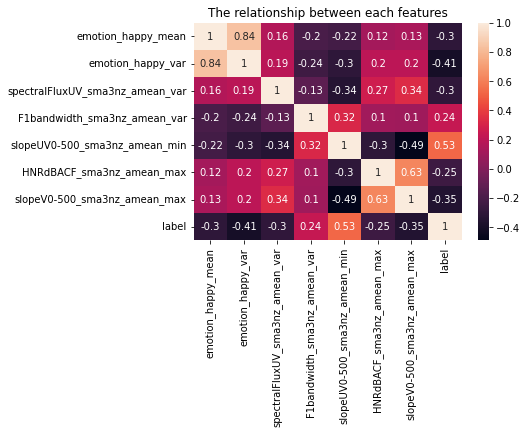

In [224]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.concat([X_train_exp6, y_train], axis=1)
sns.heatmap(df.corr(), annot=True)
plt.title("The relationship between each features")

In [8]:
rf_clf.fit(X_train_exp5, y_train)

RandomForestClassifier(n_jobs=-1, random_state=1215)

In [210]:
y_pred = rf_clf.predict(X_test_exp5) # 예측값 추론
y_pred 

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1])

## 3.3 PCA

In [222]:
# PCA를 사용하여 차원 축소
n_components = 10  # 선택할 주성분 개수
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_exp4)
X_test_pca = pca.transform(X_test_exp4)

# 4 Model
* 앞서 구현한 decision tree와 Random forest외에 다른 model들도 동일한 조건, 21개의 변수(가장 좋은 성능)을 토대로 실험해보았습니다

## 3) xgboost

In [203]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

## 4) LGBM

In [239]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# LGBM 모델 정의
lgb_model = lgb.LGBMClassifier()

In [237]:
# 예측 수행
y_pred = best_model.predict(X_test_exp4)

# 예측 결과 출력
y_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0])

In [11]:
## 최종 데이터 만들어서 예측하기
sample_submission = pd.read_csv('~/hyolim/23_1/ML/P1/sample_submission (1).csv')
sample_submission = sample_submission[['label']]
sample_submission['label'] = y_pred
sample_submission.to_csv('~/hyolim/23_1/ML/P1/rf_0.8222.csv')

In [ ]:
array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1])
